In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import save_model
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import load_model

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
# Set the path to the folder containing the images
data_folder = "/kaggle/input/personal-identification-image-dataset-for-india"

# Define the class labels and corresponding folder names
class_labels = ["Aadhaar", "PAN", "Driving Licence", "Voter ID", "Passport", "Utility"]

In [4]:
def preprocess_images(folder_path):
    images = []
    labels = []
    for i, label in enumerate(class_labels):
        folder = os.path.join(folder_path, label)
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None and img.size != 0:  # Check for valid image size
                img = cv2.resize(img, (224, 224))
                img = img / 255.0
                images.append(img)
                labels.append(i)

    return np.array(images), np.array(labels)

In [5]:
images, labels = preprocess_images(data_folder)

libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_labels), activation='softmax'))


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [8]:
history= model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/8
15/15 [==============================] - 37s 2s/step - loss: 2.6446 - accuracy: 0.2021 - val_loss: 1.8387 - val_accuracy: 0.1333
Epoch 2/8
15/15 [==============================] - 35s 2s/step - loss: 1.5919 - accuracy: 0.4083 - val_loss: 1.4605 - val_accuracy: 0.4333
Epoch 3/8
15/15 [==============================] - 35s 2s/step - loss: 1.1654 - accuracy: 0.6125 - val_loss: 0.9970 - val_accuracy: 0.6417
Epoch 4/8
15/15 [==============================] - 34s 2s/step - loss: 0.7612 - accuracy: 0.7667 - val_loss: 0.7991 - val_accuracy: 0.6750
Epoch 5/8
15/15 [==============================] - 35s 2s/step - loss: 0.5115 - accuracy: 0.8417 - val_loss: 0.8250 - val_accuracy: 0.7417
Epoch 6/8
15/15 [==============================] - 35s 2s/step - loss: 0.3049 - accuracy: 0.9062 - val_loss: 0.7239 - val_accuracy: 0.8083
Epoch 7/8
15/15 [==============================] - 35s 2s/step - loss: 0.1699 - accuracy: 0.9438 - val_loss: 1.0248 - val_accuracy: 0.7000
Epoch 8/8
15/15 [==========

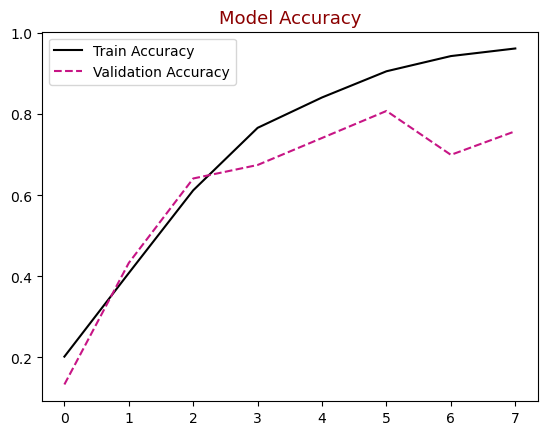

In [9]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train Accuracy",color="black")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy",color="mediumvioletred",linestyle="dashed",markeredgecolor="purple",markeredgewidth=2)
plt.title("Model Accuracy",color="darkred",size=13)
plt.legend()
plt.show()


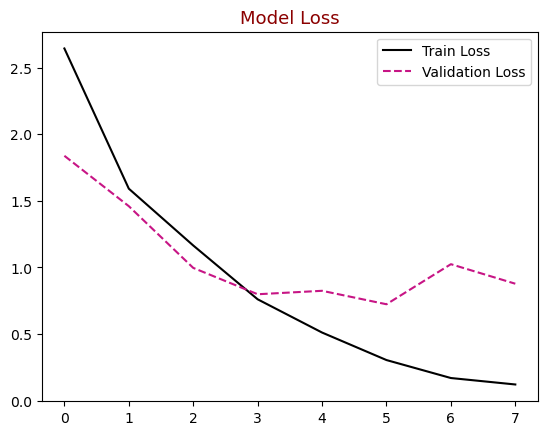

In [10]:
plt.figure()
plt.plot(history.history["loss"],label="Train Loss",color="black")
plt.plot(history.history["val_loss"],label="Validation Loss",color="mediumvioletred",linestyle="dashed",markeredgecolor="purple",markeredgewidth=2)
plt.title("Model Loss",color="darkred",size=13)
plt.legend()
plt.show()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [12]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Save the trained model
model.save("image_classifier_model.h5")

4/4 [==============================] - 2s 513ms/step - loss: 0.8781 - accuracy: 0.7583
Test Loss: 0.878132700920105
Test Accuracy: 0.7583333253860474


In [13]:
# Load the trained model
from keras.models import load_model
model = load_model("image_classifier_model.h5")

In [14]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add an extra dimension for batch size
    return img

In [15]:
# Path to the input image you want to predict
input_image_path = "/kaggle/input/personal-identification-image-dataset-for-india/Driving Licence/10.jpg"

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions on the input image
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 155ms/step
Predicted Class: Driving Licence


In [16]:
!pip install pytesseract
import pytesseract
!apt-get install tesseract-ocr
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [17]:
img = cv2.imread(input_image_path)


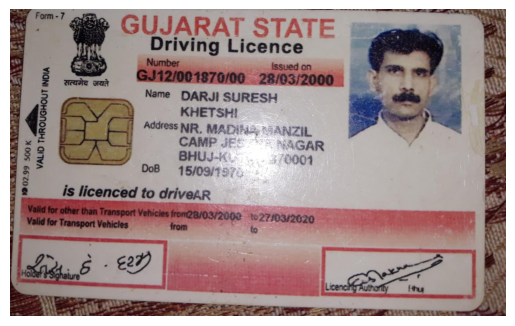

In [18]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib.pyplot
plt.imshow(image_rgb)
plt.axis('off')  # Remove axis ticks and labels
plt.show()

In [19]:
text = pytesseract.image_to_string(img)


In [20]:
text

'Driving Licence\n\nNumber issued on\nGJ12/001870/00 28/03/2000\nName DARJI SURESH\nKHETSH!\nAddress NR, MADR, ANZIL\nCAMP Jr 4GAR\nBHUS- 8004\n\nDB 15/09/42:\nis licenced to drivezR\n\nValid for other than Transport Vehicies war\n9 tape ences fonaBios/2000 03/2020\n\n \n\x0c'